In [1]:
from scipy.io import loadmat 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
real = pd.read_csv('VSI_test2_real_discharge.csv',sep=';', header=None)
real.head()

,0,1,2,3,4,5,6,7,8
0,21.06.2025 01:50:00,21.06.2025 01:50:30,"26,900056838989258","26,300056457519531","57,881561279296875","47,288429260253906","55,633373260498047",0.0,NaN
1,21.06.2025 01:50:30,21.06.2025 01:51:00,"26,91529655456543","26,299999237060547","57,875022888183594","47,284885406494141","55,635097503662109",0.0,NaN
2,21.06.2025 01:51:00,21.06.2025 01:51:30,"26,951528549194336","26,315526962280273","57,884838104248047","47,289993286132812","55,6332893371582",0.0,NaN
3,21.06.2025 01:51:30,21.06.2025 01:52:00,"26,899999618530273","26,384923934936523","57,868232727050781","47,289997100830078","55,630374908447266",0.0,NaN
4,21.06.2025 01:52:00,21.06.2025 01:52:30,"26,944005966186523","26,300069808959961","57,884819030761719","47,28515625","55,625381469726563",0.0,NaN


In [4]:
# Replace ',' with '.' and convert columns to float
header_conv = header[1:]
for col in header_conv:
    real_clean[col] = real_clean[col].astype(str).str.replace(',', '.', regex=False)
    real_clean[col] = pd.to_numeric(real_clean[col], errors='coerce') 
real_clean.head()

,time,RL_real,feed_real,up_real,low_real,mid_real
0,0.0,26.900057,26.300056,57.881561,47.288429,55.633373
1,30.0,26.915297,26.299999,57.875023,47.284885,55.635098
2,60.0,26.951529,26.315527,57.884838,47.289993,55.633289
3,90.0,26.900000,26.384924,57.868233,47.289997,55.630375
4,120.0,26.944006,26.300070,57.884819,47.285156,55.625381


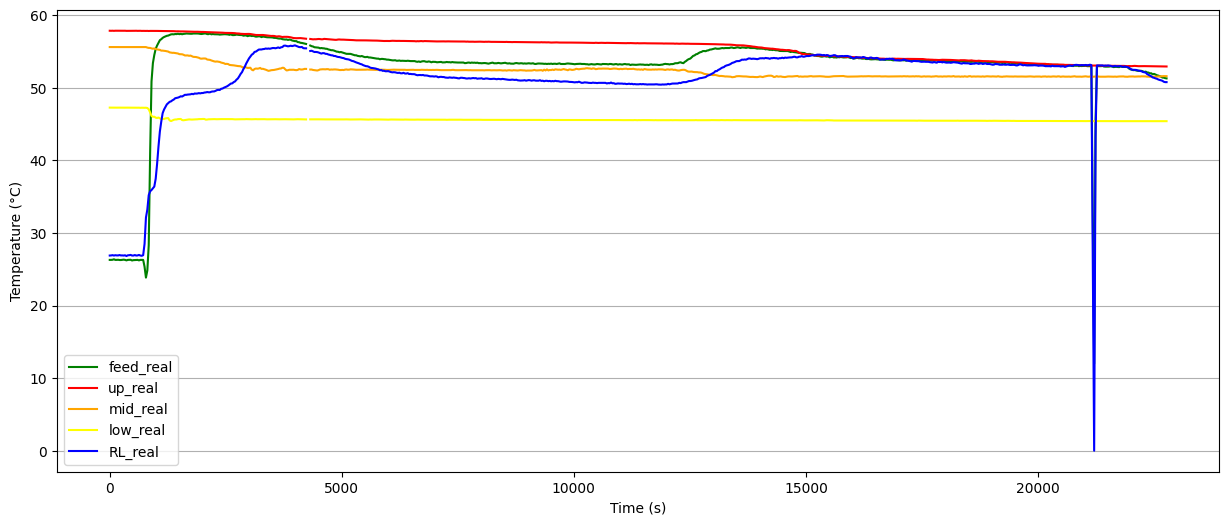

In [5]:
plt.figure(figsize=(15,6))

for col, color in zip(['feed_real', 'up_real', 'mid_real', 'low_real','RL_real'], ['green', 'red', 'orange', 'yellow','blue']):
    plt.plot(real_clean['time'], real_clean[col], label=col, color=color)

plt.ylabel("Temperature (°C)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(axis = 'y')
plt.show()

Considering that the RL temperature is almost the same as the VL temperature, the discharge mode should be on.

# Test 1 - 7 layers - discharge mode on
 - V = 7000L
 - m_nominal (all valves) = 2 m3/h
 - dp_nominal = 1 bar (changing from 1e-5 to 1 didn't affect output temperatures)

In [6]:
sim = pd.read_csv('VSI_test2_sim_discharge_2.csv', sep = ',', header = None)
sim.head()

,0,1,2,3,4
0,Time,layeredStorage_Physical.localState.fUpperTempe...,layeredStorage_Physical.localState.fMidTempera...,layeredStorage_Physical.localState.fLowerTempe...,layeredStorage_Physical.feedTemperature
1,0,331.15,328.15,320.15,300
2,50.4,330.99765,327.9413,319.16754,301.568
3,100.8,330.85236,327.73044,318.31317,303.136
4,151.2,330.71277,327.5158,317.57718,304.704


In [9]:
def clean_sim (df):
    header_sim =['time','up_sim','mid_sim','low_sim','feed_sim']
    header_sim_conv = header_sim[1:]
    sim_clean = df.iloc[1:]
    sim_clean.columns = header_sim
    for col in header_sim_conv:
        sim_clean[col] = pd.to_numeric(sim_clean[col], errors='coerce')
        sim_clean.loc[:, col] = sim_clean[col] - 273.15 #converting to °C
    sim_clean['time'] = pd.to_numeric(sim_clean['time'], errors='coerce')
    return sim_clean

In [10]:
sim_clean = clean_sim(sim)
sim_clean.head()

C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_16120\3792094377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_clean[col] = pd.to_numeric(sim_clean[col], errors='coerce')
C:\Users\Giovanna Fusco\AppData\Local\Temp\ipykernel_16120\3792094377.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim_clean['time'] = pd.to_numeric(sim_clean['time'], errors='coerce')


,time,up_sim,mid_sim,low_sim,feed_sim
1,0.0,58.00000,55.00000,47.00000,26.850
2,50.4,57.84765,54.79130,46.01754,28.418
3,100.8,57.70236,54.58044,45.16317,29.986
4,151.2,57.56277,54.36580,44.42718,31.554
5,201.6,57.42883,54.14727,43.80883,33.122


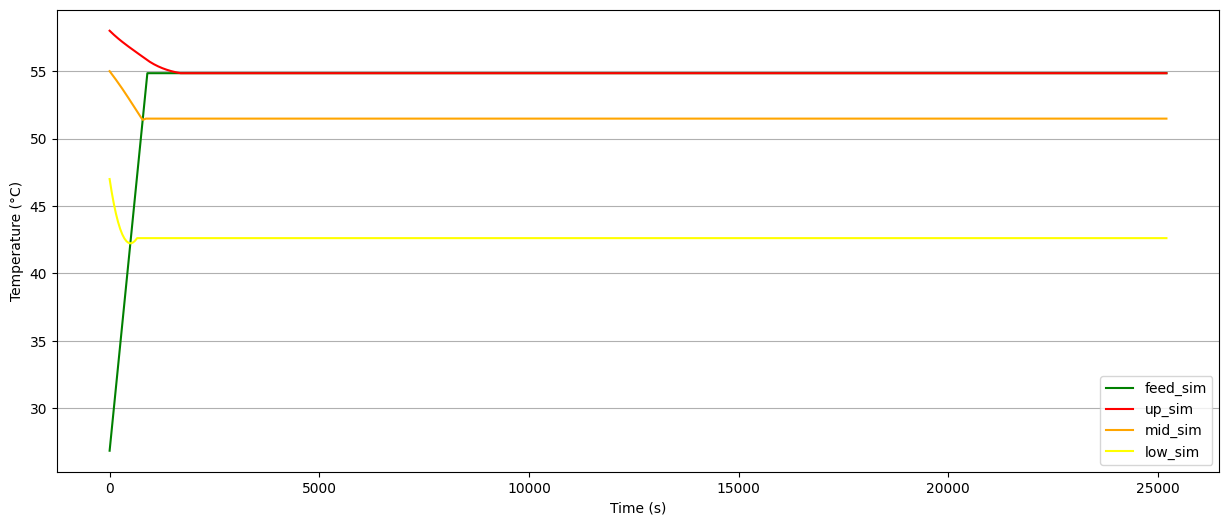

In [11]:
plt.figure(figsize=(15,6))

for col, color in zip(['feed_sim', 'up_sim', 'mid_sim', 'low_sim'], ['green', 'red', 'orange', 'yellow']):
    plt.plot(sim_clean['time'], sim_clean[col], label=col, color=color)

plt.ylabel("Temperature (°C)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(axis = 'y')
plt.show()

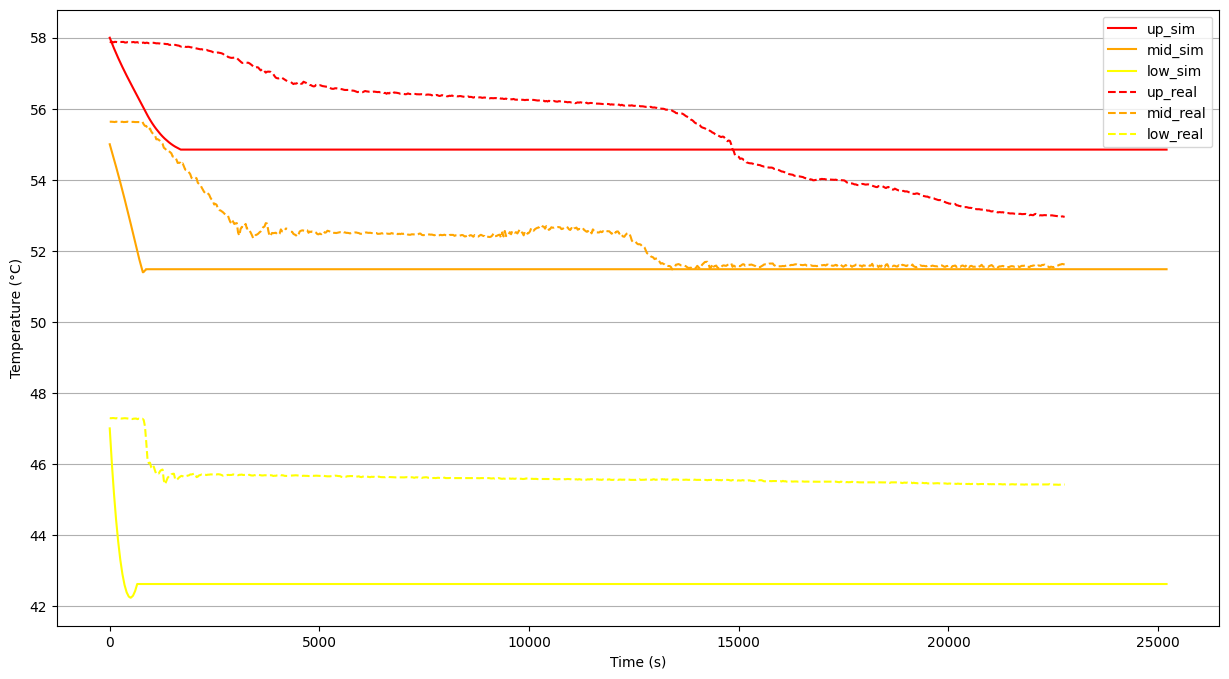

In [14]:
plt.figure(figsize=(15,8))
for col, color in zip(['up_sim', 'mid_sim', 'low_sim'], ['red', 'orange', 'yellow']):
    plt.plot(sim_clean['time'], sim_clean[col], label=col, color=color)
for col, color, linestyle in zip(['up_real', 'mid_real', 'low_real'], [ 'red', 'orange', 'yellow'],['--', '--', '--', '--']):
    plt.plot(real_clean['time'], real_clean[col], label=col, color=color, linestyle=linestyle)
plt.ylabel("Temperature (°C)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(axis = 'y')
plt.show()

In [14]:
import matplotlib.ticker as ticker

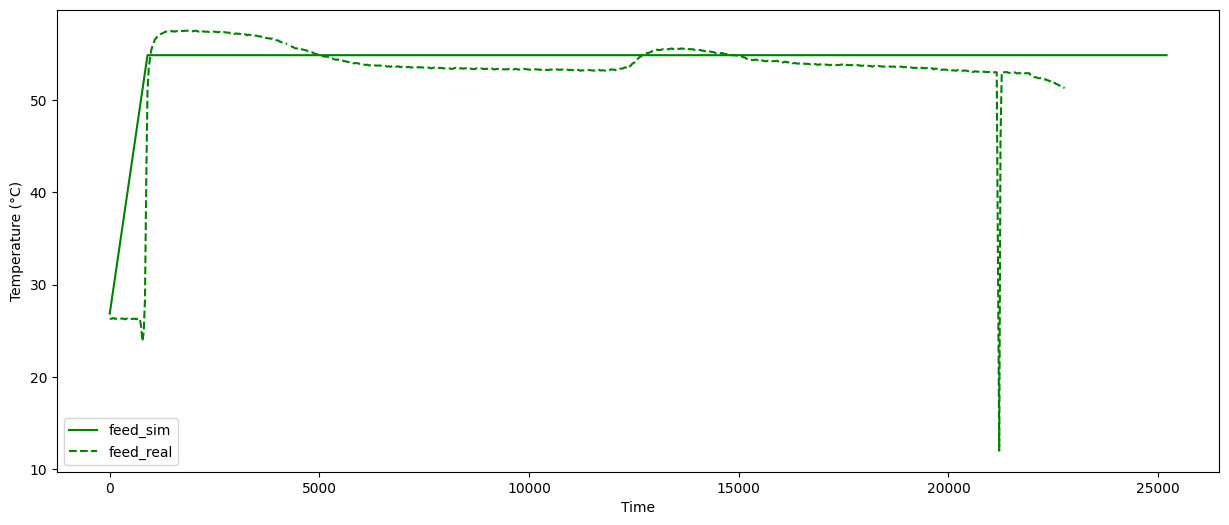

In [15]:
plt.figure(figsize=(15,6))
for col, color in zip(['feed_sim'], ['green']):
    plt.plot(sim_clean['time'], sim_clean[col], label=col, color=color)
for col, color, linestyle in zip(['feed_real'], ['green'],['--']):
    plt.plot(real_clean['time'], real_clean[col], label=col, color=color, linestyle=linestyle)
plt.ylabel("Temperature (°C)")
plt.xlabel("Time")
#ax.set_yticks(np.arange(10, 60, 5))
plt.legend()
plt.show()